# Multi-class classification

## One-vs-Rest

1. Generate data with three classes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # Sigmoid function

# Fix random seed for reproducibility
np.random.seed(42)

# Generate synthetic 2D data for three classes (Red, Green, Blue)
N = 100  # Number of points per class
X_red = np.random.randn(N, 2) + np.array([2, 2])
X_green = np.random.randn(N, 2) + np.array([-2, 2])
X_blue = np.random.randn(N, 2) + np.array([0, -2])

# Stack all samples into one dataset
X = np.vstack([X_red, X_green, X_blue])  # Shape: (3N, 2)
y = np.array([0] * N + [1] * N + [2] * N)  # Class labels: 0 (Red), 1 (Green), 2 (Blue)

# Augment feature matrix X by adding a bias term (x_0 = 1)
X_aug = np.hstack([np.ones((3 * N, 1)), X])  # Shape: (3N, 3)

2. Logistic regression training using Gradient Descent (labels in {+1, -1})

In [ ]:
# Define sigmoid function (logistic function)
def sigmoid(z):
    return expit(z)  # Equivalent to 1 / (1 + np.exp(-z))

def train_ova_logistic_regression(X, y, num_classes=3, lr=0.1, epochs=1000):
    N, d = X.shape  # N = 3N (number of samples), d = 3 (bias + 2 features)
    W = np.zeros((num_classes, d))  # Weight matrix (K x d)

    for c in range(num_classes):  # Train one classifier per class (OvA)
        y_bin = np.where(y == c, +1, -1)  # Convert to binary labels (+1 vs -1)
        for epoch in range(epochs):
            scores = X @ W[c]  # Linear scores
            probs = sigmoid(- y_bin * scores)  # Probability using {-1, +1} loss
            gradient = (X.T @ (-y_bin * probs)) / N  # Compute gradient
            W[c] -= lr * gradient  # Gradient descent step

    return W

# Train OvA logistic regression
W_ova = train_ova_logistic_regression(X_aug, y)

3. Compute decision boundaries [here it is adaptive so that you can later seclect the contour level]

In [ ]:
# Plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Compute decision boundaries
Z = np.zeros((xx.shape[0], xx.shape[1], 3))
for c in range(3):
    X_grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
    Z[:, :, c] = sigmoid(X_grid @ W_ova[c]).reshape(xx.shape)


4. Plot data and decision boundaries

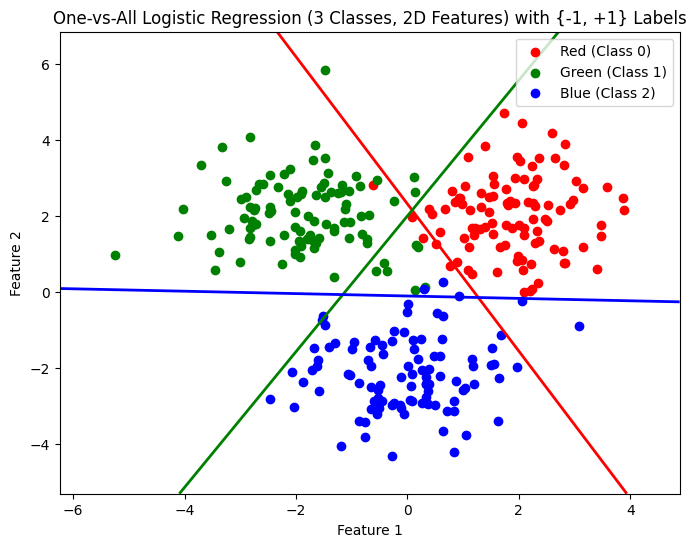

In [ ]:
# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X_red[:, 0], X_red[:, 1], color='red', label="Red (Class 0)")
plt.scatter(X_green[:, 0], X_green[:, 1], color='green', label="Green (Class 1)")
plt.scatter(X_blue[:, 0], X_blue[:, 1], color='blue', label="Blue (Class 2)")

# Plot the decision boundaries
contour_levels = [0.5]  # Decision threshold for OvA
plt.contour(xx, yy, Z[:, :, 0], levels=contour_levels, colors='red', linewidths=2)
plt.contour(xx, yy, Z[:, :, 1], levels=contour_levels, colors='green', linewidths=2)
plt.contour(xx, yy, Z[:, :, 2], levels=contour_levels, colors='blue', linewidths=2)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("One-vs-All Logistic Regression (3 Classes, 2D Features) with {-1, +1} Labels")
plt.show()

## Multiclass Logistic

In [ ]:
from scipy.special import softmax  # Softmax function

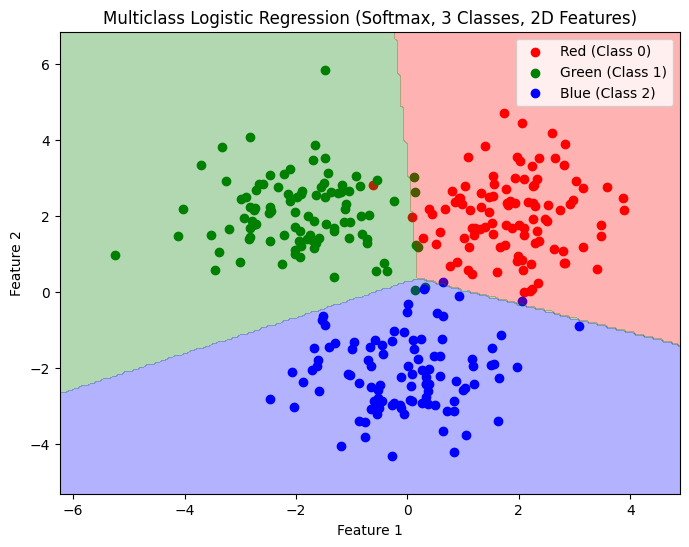

In [ ]:
# Softmax regression training using Gradient Descent
def train_softmax_regression(X, y, num_classes=3, lr=0.1, epochs=1000):
    N, d = X.shape  # N = 3N (number of samples), d = 3 (bias + 2 features)
    W = np.zeros((num_classes, d))  # Weight matrix (K x d)

    for epoch in range(epochs):
        scores = X @ W.T  # Compute class scores (N x K)
        probs = softmax(scores, axis=1)  # Compute softmax probabilities (N x K)
        y_one_hot = np.eye(num_classes)[y]  # Convert labels to one-hot encoding (N x K)
        gradient = (X.T @ (probs - y_one_hot)) / N  # Compute gradient
        W -= lr * gradient.T  # Gradient descent step

    return W

# Train softmax regression
W_softmax = train_softmax_regression(X_aug, y)

# Plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Compute decision boundaries
X_grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
Z = np.argmax(softmax(X_grid @ W_softmax.T, axis=1), axis=1).reshape(xx.shape)

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X_red[:, 0], X_red[:, 1], color='red', label="Red (Class 0)")
plt.scatter(X_green[:, 0], X_green[:, 1], color='green', label="Green (Class 1)")
plt.scatter(X_blue[:, 0], X_blue[:, 1], color='blue', label="Blue (Class 2)")

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, levels=[-0.5, 0.5, 1.5, 2.5], colors=['red', 'green', 'blue'])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Multiclass Logistic Regression (Softmax, 3 Classes, 2D Features)")
plt.show()
